<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

## *Data Science Unit 4 Sprint 2*

# Sprint Challenge - Neural Network Foundations

Table of Problems

1. [Defining Neural Networks](#Q1)
2. [Simple Perceptron](#Q2)
    - Perceptron
    - Multilayer Perceptron
    - Analyze and Compare
4. [Keras MMP](#Q3)

<a id="Q1"></a>
## 1. Defining Neural Networks 

Write *your own* definitions for the following terms:

- **Neuron:** Simple nodes that are highly interconnected elements and organized in layers that process information using dynamic state responses.
- **Input Layer:** Provides network patterns that communicates to the hidden layer/s. Passive nodes that receives single value on input and duplicate the value to multiple outputs.
- **Hidden Layer:** mathematical functions which intends to give intentional results.
- **Output Layer:** link to hidden layers, hidden layers gives the connection to output layer and yields an output of prediction of the response variable.
- **Activation Function:** can be found in nodes, it defines the output of the node that is provided an input/s.

Explain how back propagation works as if you were explaining it to a five year-old. Use your own words, but feel free to reference external materials for this question. 

Backpropagation is for computers to remember their mistakes and not to do it again, or do better next time. While these computers are being used, they keep getting better at the thing we ask them to do. Then when they all get better on these tasks, if they put these things they learned altogether, they can now perform a more difficult job.

Remember our Simple Perceptron Class from Monday. In a simple prediction describe the process of making a prediction. How do you go from inputs to predicted output.

Single perceptron is an arrangement of one input layer of neurons feeding forward to one output layer.

<a id="Q2"></a>
## 2. Simple Perceptron

In this question, you will build two neural networks using Tensorflow Keras. After you build these two models, compare the results of the model.

In [1]:
"""
Our Dataset
"""
import numpy as np

xx, yy = np.meshgrid(np.linspace(-3, 3, 50),
                     np.linspace(-3, 3, 50))
rng = np.random.RandomState(0)

"Use this X & y in the following 2 models"
X = rng.randn(300, 2)
y = np.array(np.logical_xor(X[:, 0] > 0, X[:, 1] > 0), 
             dtype=int)

### Simple Perceptron
Construct a simple perceptron using Keras. You model should have 1 dense layer with a single neuron and a sigmoid activation function. Your model should be called `model1` and make sure to save the results of your fit statement to a variable called `h1`. 

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model1 = Sequential()
model1.add(Dense(units=1, input_dim=2, activation='sigmoid'))

model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
h1 = model1.fit(X, y, epochs=5)

Epoch 1/5
10/10 [==============================] - 0s 2ms/step - loss: 0.9556 - accuracy: 0.4467
Epoch 2/5
10/10 [==============================] - 0s 2ms/step - loss: 0.9521 - accuracy: 0.4467
Epoch 3/5
10/10 [==============================] - 0s 2ms/step - loss: 0.9488 - accuracy: 0.4467
Epoch 4/5
10/10 [==============================] - 0s 2ms/step - loss: 0.9452 - accuracy: 0.4500
Epoch 5/5
10/10 [==============================] - 0s 2ms/step - loss: 0.9418 - accuracy: 0.4500


In [3]:
# evaluate the model
scores = model1.evaluate(X, y)
print(f"{model1.metrics_names[1]}: {scores[1]*100}")

10/10 [==============================] - 0s 2ms/step - loss: 0.9397 - accuracy: 0.4500
accuracy: 44.999998807907104


### Multi-Layer Perceptron
Now construct a multi-layer perceptron using. Here are some architecture suggestions: 
- 2 Hidden Layers
- 5-32 Neurons in the Hidden Layers
- Your pick of activation function and optimizer
- Incorporate the Callback function below into your model

Your model should be called `model2` and make sure to save the results of your fit statement to a variable called `h2`. 

In [4]:
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        if(logs.get('accuracy') > .99999):   
            self.model.stop_training = True

In [5]:
model2 = Sequential([
  Dense(512, activation='relu', input_dim=2),
  Dense(10, activation='softmax')
])

# compile model
model2.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# fit on training / evaluate on validation set
h2 = model2.fit(X, y,
          epochs=10,
          validation_split=0.2)

Epoch 1/10
8/8 [==============================] - 0s 15ms/step - loss: 2.1503 - accuracy: 0.4625 - val_loss: 1.9277 - val_accuracy: 0.7833
Epoch 2/10
8/8 [==============================] - 0s 4ms/step - loss: 1.8188 - accuracy: 0.7583 - val_loss: 1.6164 - val_accuracy: 0.9000
Epoch 3/10
8/8 [==============================] - 0s 4ms/step - loss: 1.5132 - accuracy: 0.9042 - val_loss: 1.3386 - val_accuracy: 0.9333
Epoch 4/10
8/8 [==============================] - 0s 4ms/step - loss: 1.2449 - accuracy: 0.9333 - val_loss: 1.1009 - val_accuracy: 0.9333
Epoch 5/10
8/8 [==============================] - 0s 4ms/step - loss: 1.0184 - accuracy: 0.9250 - val_loss: 0.9158 - val_accuracy: 0.9000
Epoch 6/10
8/8 [==============================] - 0s 4ms/step - loss: 0.8393 - accuracy: 0.9208 - val_loss: 0.7782 - val_accuracy: 0.8500
Epoch 7/10
8/8 [==============================] - 0s 4ms/step - loss: 0.7065 - accuracy: 0.9167 - val_loss: 0.6736 - val_accuracy: 0.8667
Epoch 8/10
8/8 [=================

In [8]:
# evaluate on test data
model2.evaluate(X, y)

10/10 [==============================] - 0s 2ms/step - loss: 0.4703 - accuracy: 0.9233


[0.470326691865921, 0.9233333468437195]

### Analyze and Compare

**Before you Start**: You will need to install an additional library for this next segment. Install the package `mlxtend` into the environment you are using for the sprint challenge.


The cells below generate decision boundary plots of your models (`model1` & `model2`). Review the plots.

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


ValueError: ignored

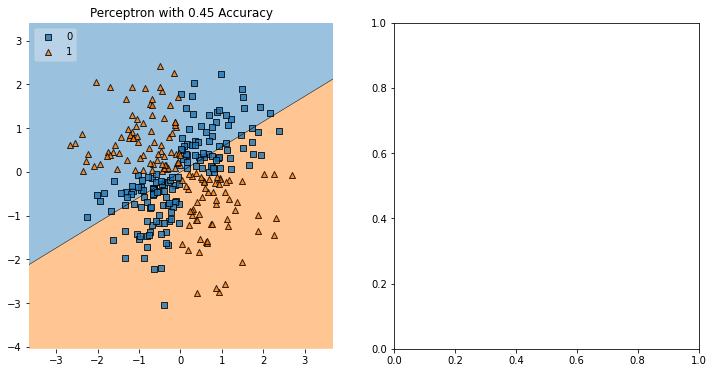

In [6]:
# Do Not change anything in this cell

import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

h = .02  # step size in the mesh

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - .2, X[:, 0].max() + .2
y_min, y_max = X[:, 1].min() - .2, X[:, 1].max() + .2
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

fig = plt.figure(figsize=(12,6))


for clf, hist, name, grd in zip([model1,model2], [h1, h2],['Perceptron', 'Multi-Layer Perceptron'],[1,2]):

    ax = plt.subplot(1,2, grd)
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    title = f"{name} with {hist.history['accuracy'][-1]:,.2f} Accuracy"
    plt.title(title)

plt.show()

Why does the Perceptron (`model1`) only achieve ~70% accuracy? What is the architectural property of the Multi-Layer Perceptron that allows it more accurately learn the relationship between X and y? 

Why might this property be useful in more complex data such as images?

In [ ]:
# Your Answer Here - Change the Cell to Markdown

## 3. Keras MMP <a id="Q3"></a>

Implement a Multilayer Perceptron architecture of your choosing using the Keras library. Train your model and report its baseline accuracy. Then hyperparameter tune at least two parameters and report your model's accuracy.
Use the Heart Disease Dataset (binary classification)
Use an appropriate loss function for a binary classification task
Use an appropriate activation function on the final layer of your network.
Train your model using verbose output for ease of grading.
Use GridSearchCV or RandomSearchCV to hyperparameter tune your model. (for at least two hyperparameters)
When hyperparameter tuning, show you work by adding code cells for each new experiment.
Report the accuracy for each combination of hyperparameters as you test them so that we can easily see which resulted in the highest accuracy.
You must hyperparameter tune at least 3 parameters in order to get a 3 on this section.

In [10]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/heart.csv')
df = df.sample(frac=1)
print(df.shape)
df.head()

(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
50,51,0,2,130,256,0,0,149,0,0.5,2,0,2,1
112,64,0,2,140,313,0,1,133,0,0.2,2,0,3,1
253,67,1,0,100,299,0,0,125,1,0.9,1,2,2,0
55,52,1,1,134,201,0,1,158,0,0.8,2,1,2,1
59,57,0,0,128,303,0,0,159,0,0.0,2,1,2,1


In [28]:
# Your Code Here


import tensorflow as tf
from tensorflow import keras
from keras.utils import normalize
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import GridSearchCV, train_test_split
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam, Adagrad, SGD, Ftrl, RMSprop

In [14]:
target = "target"
features = [column for column in df.columns if column != "target"]

y = df[target].values
X = df[features].values

In [15]:
normal_X = normalize(X)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(normal_X, y, train_size= 0.8, test_size= 0.2)

In [18]:
model = Sequential([
    Dense(64, activation= "sigmoid", input_shape= (13,)),
    Dense(32, activation= "relu"),
    Dense(16, activation= "sigmoid"),
    Dense(8, activation= "relu"),
    Dense(1, activation= "sigmoid")
])

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

hist = model.fit(X_train, y_train,
          batch_size=32, epochs=100,
          validation_data=(X_test, y_test))

Epoch 1/100
8/8 [==============================] - 0s 18ms/step - loss: 0.2649 - accuracy: 0.4504 - val_loss: 0.2556 - val_accuracy: 0.4754
Epoch 2/100
8/8 [==============================] - 0s 5ms/step - loss: 0.2560 - accuracy: 0.4504 - val_loss: 0.2519 - val_accuracy: 0.4754
Epoch 3/100
8/8 [==============================] - 0s 5ms/step - loss: 0.2512 - accuracy: 0.4504 - val_loss: 0.2501 - val_accuracy: 0.4754
Epoch 4/100
8/8 [==============================] - 0s 4ms/step - loss: 0.2499 - accuracy: 0.5248 - val_loss: 0.2499 - val_accuracy: 0.5246
Epoch 5/100
8/8 [==============================] - 0s 5ms/step - loss: 0.2496 - accuracy: 0.5496 - val_loss: 0.2498 - val_accuracy: 0.5246
Epoch 6/100
8/8 [==============================] - 0s 4ms/step - loss: 0.2496 - accuracy: 0.5496 - val_loss: 0.2497 - val_accuracy: 0.5246
Epoch 7/100
8/8 [==============================] - 0s 4ms/step - loss: 0.2494 - accuracy: 0.5496 - val_loss: 0.2497 - val_accuracy: 0.5246
Epoch 8/100
8/8 [=========

In [29]:
# Function to create model

def create_model(units=32):
    
    # create model
    model = Sequential([
    Dense(64, activation= "sigmoid", input_shape= (13,)),
    Dense(32, activation= "relu"),
    Dense(16, activation= "sigmoid"),
    Dense(8, activation= "relu"),
    Dense(1, activation= "sigmoid")
    ])
    
    # compile model
    model.compile(loss='mean_squared_error', optimizer='adam', 
                  metrics=['accuracy'])
    
    return model

In [31]:
# create model
model = KerasClassifier(build_fn=create_model, verbose=1)

# define grid search parameters
param_grid = {'batch_size': [10, 20, 40], 
              'epochs': [20, 30, 50]}

# create grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1)

# report results
grid_result = grid.fit(X_train, y_train)

Epoch 1/20
20/20 [==============================] - 0s 2ms/step - loss: 0.2558 - accuracy: 0.5233
Epoch 2/20
20/20 [==============================] - 0s 2ms/step - loss: 0.2498 - accuracy: 0.5233
Epoch 3/20
20/20 [==============================] - 0s 2ms/step - loss: 0.2498 - accuracy: 0.5233
Epoch 4/20
20/20 [==============================] - 0s 2ms/step - loss: 0.2498 - accuracy: 0.5233
Epoch 5/20
20/20 [==============================] - 0s 2ms/step - loss: 0.2496 - accuracy: 0.5233
Epoch 6/20
20/20 [==============================] - 0s 2ms/step - loss: 0.2496 - accuracy: 0.5233
Epoch 7/20
20/20 [==============================] - 0s 2ms/step - loss: 0.2497 - accuracy: 0.5233
Epoch 8/20
20/20 [==============================] - 0s 2ms/step - loss: 0.2495 - accuracy: 0.5233
Epoch 9/20
20/20 [==============================] - 0s 2ms/step - loss: 0.2496 - accuracy: 0.5233
Epoch 10/20
20/20 [==============================] - 0s 2ms/step - loss: 0.2496 - accuracy: 0.5233
Epoch 11/20
20/20 [

In [32]:
grid.best_params_

{'batch_size': 10, 'epochs': 20}

In [33]:
optimizers = ["Adagrad", "sgd"]

for optimizer in optimizers:
    
    print(f"Optimizer: {optimizer}")
    
    model = create_model(optimizer)
    
    model.fit(X_train, y_train, epochs= 50, batch_size= 10, 
              validation_data= (X_test, y_test))

Optimizer: Adagrad
Epoch 1/50
25/25 [==============================] - 0s 10ms/step - loss: 0.2937 - accuracy: 0.5496 - val_loss: 0.2822 - val_accuracy: 0.5246
Epoch 2/50
25/25 [==============================] - 0s 4ms/step - loss: 0.2613 - accuracy: 0.5496 - val_loss: 0.2558 - val_accuracy: 0.5246
Epoch 3/50
25/25 [==============================] - 0s 3ms/step - loss: 0.2497 - accuracy: 0.5496 - val_loss: 0.2505 - val_accuracy: 0.5246
Epoch 4/50
25/25 [==============================] - 0s 4ms/step - loss: 0.2475 - accuracy: 0.5496 - val_loss: 0.2496 - val_accuracy: 0.5246
Epoch 5/50
25/25 [==============================] - 0s 3ms/step - loss: 0.2478 - accuracy: 0.5496 - val_loss: 0.2498 - val_accuracy: 0.5246
Epoch 6/50
25/25 [==============================] - 0s 3ms/step - loss: 0.2473 - accuracy: 0.5496 - val_loss: 0.2494 - val_accuracy: 0.5246
Epoch 7/50
25/25 [==============================] - 0s 3ms/step - loss: 0.2485 - accuracy: 0.5496 - val_loss: 0.2500 - val_accuracy: 0.5246
